In [1]:
%matplotlib inline
import math
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import  statsmodels.api as sm 
import torch


In [2]:
import sys 

In [3]:
sys.path.append('../../')

In [4]:
from omd2l.data.DataModule import SyntheticRegressionData

In [5]:
from omd2l.models.base.Trainer import Trainer

In [6]:
from omd2l.models.linear.LinearRegressionScratch import LinearRegressionScratch

## Generate Synthetic data 

In [7]:
# help(d2l.SyntheticRegressionData)

In [8]:
synthetic_data_weights = torch.tensor([2, -3.4, 1, -8, 4, 3, -9, 1,  2, -6])
synthetic_data_b = 4.2
num_dim =  synthetic_data_weights.shape[0]

In [9]:
num_dim

10

In [10]:
data = SyntheticRegressionData(w=synthetic_data_weights, 
                                   b=synthetic_data_b,
                                  num_train=1000,
                                  num_val=1000,
                                  batch_size=100,
                                  noise=0.5)

In [11]:
data.X = data.X[:,:8]
num_dim =  data.X.shape[1]

In [12]:
data.y.shape

torch.Size([2000, 1])

## Linear regression using sklearn 

In [13]:
nX = data.X.detach().numpy()
ny = data.y.detach().numpy()

In [14]:
sk_model = LinearRegression()
sk_model.fit(nX, ny)

LinearRegression()

In [15]:
sk_model.coef_, sk_model.intercept_

(array([[ 1.7873943 , -3.4240875 ,  0.8890998 , -8.222127  ,  3.8118467 ,
          2.9994967 , -8.916243  ,  0.56067866]], dtype=float32),
 array([4.35934], dtype=float32))

## Linear regression using statsmodels

In [16]:
sm_mdl = sm.OLS(endog=ny, exog=sm.add_constant(nX)).fit()

In [17]:
sm_mdl.params

array([ 4.35934063,  1.78739142, -3.42408733,  0.8891009 , -8.22213104,
        3.8118476 ,  2.99949406, -8.91623836,  0.56067407])

## Linear Regression from scratch 

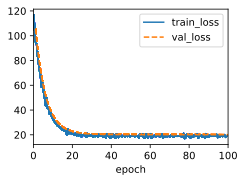

In [18]:
model_scratch = LinearRegressionScratch(num_inputs=num_dim, lr=0.01)
trainer = Trainer(max_epochs=100)
trainer.fit(model_scratch, data)

In [19]:
model_scratch.w, model_scratch.b

(tensor([[ 1.8688],
         [-3.3911],
         [ 0.9511],
         [-8.1849],
         [ 3.7970],
         [ 2.7659],
         [-8.8619],
         [ 0.4068]], requires_grad=True),
 tensor([4.3135], requires_grad=True))

## Linear Regression based on pytorch

In [20]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=100)
trainer.fit(model, data)

NameError: name 'd2l' is not defined

In [ ]:
model.get_w_b()